In [ ]:
!pip install pycaret
import pycaret
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from pycaret.time_series import TSForecastingExperiment
from pycaret.time_series import *

In [ ]:
from pycaret .datasets import get_data
data = get_data('PDB_Load_History')

,date,year,month,day,weekday,hour,demand,temperature
0,3/1/2003,2003,3,1,7,1,12863.0,29
1,3/1/2003,2003,3,1,7,2,12389.0,28
2,3/1/2003,2003,3,1,7,3,12155.0,29
3,3/1/2003,2003,3,1,7,4,12072.0,27
4,3/1/2003,2003,3,1,7,5,12160.0,29


In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
df = pd.DataFrame(data[['date','demand']])
df['date'] = pd.to_datetime(df['date'])
df = pd.DataFrame(df.resample('D', on='date', origin = 'start').sum())
df.reset_index(inplace=True)
df.head()

,date,demand
0,2003-03-01,341205.0
1,2003-03-02,332439.0
2,2003-03-03,392373.0
3,2003-03-04,397812.0
4,2003-03-05,369405.0


In [ ]:
# create 14 days (two weeks) moving average.
df['MA14'] = df['demand'].rolling(14).mean()# plot the data and MA
import plotly.express as px
fig = px.line(df, x="date", y=["demand", "MA14"], template = 'plotly_dark')
fig.show()

I will use PyCaret's regression module to make forward demand forecasts. However, in order for the regression module to forecast with more than one feature, all columns in the dataset except the target column (we can call it as X_test data in this section) must be present. So, I'll create the X_test myself. Whatever date range I want to forecast in the future, I will define a date range. The main issue here is; Although I can obtain information such as day, month, year, day of the year from the date information, I do not have the temperature information of the future days. To solve this I will use the time_series module, which is a useful module of PyCaret. Time series module gives very good results as univariate. However, work continues on forecasting a single target output with multiple features. With this module, I will forecast the temperature information of the next month day by day. I will fill in the temperature feature of the X_test data that I will create later with the values I have obtained from here.

In [ ]:
temperature = data[['temperature','date']].copy()
temperature['date'] = pd.to_datetime(temperature['date'])
temperature = pd.DataFrame(temperature.resample('D', on='date', origin = 'start').mean())

In [ ]:
df['month'] = [i.month for i in df['date']]
df['year'] = [i.year for i in df['date']]
df['day'] = [i.day for i in df['date']]
df['day_of_year'] = [i.dayofyear for i in df['date']]
df['temperature'] = temperature['temperature'].reset_index(drop=True)

In [ ]:
from pycaret.time_series import TSForecastingExperiment

# Create a TSForecastingExperiment object
exp = TSForecastingExperiment()

# Setup the experiment with the temperature data
exp.setup(data=temperature, fh=31, fold=3, session_id=123)

,Description,Value
0,session_id,123
1,Target,temperature
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(4324, 1)"
5,Transformed data shape,"(4324, 1)"
6,Transformed train set shape,"(4293, 1)"
7,Transformed test set shape,"(31, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best_ = compare_models()
best_ = exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.3050,1.1858,7.9973,9.4895,0.1764,0.1569,-0.7061,0.7267
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.3105,1.1928,8.0311,9.5458,0.1762,0.1574,-0.7229,0.8700
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.3105,1.1928,8.0311,9.5458,0.1762,0.1574,-0.7229,1.0733
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.3105,1.1928,8.0313,9.5459,0.1762,0.1574,-0.7230,0.7367
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.3109,1.1911,8.0337,9.5322,0.1769,0.1576,-0.7198,0.7367
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.3112,1.1913,8.0353,9.5337,0.1770,0.1576,-0.7203,0.7567
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.3112,1.1913,8.0353,9.5337,0.1770,0.1576,-0.7203,2.6133
auto_arima,Auto ARIMA,1.3551,1.1995,8.3042,9.5980,0.1902,0.1628,-0.8240,59.3400
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.3807,1.2251,8.4611,9.8036,0.1681,0.1582,-1.3295,0.8667
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.4109,1.3695,8.6464,10.9599,0.1717,0.1812,-1.2990,1.2800


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.3050,1.1858,7.9973,9.4895,0.1764,0.1569,-0.7061,0.9167
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.3105,1.1928,8.0311,9.5458,0.1762,0.1574,-0.7229,1.2233
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.3105,1.1928,8.0311,9.5458,0.1762,0.1574,-0.7229,0.7667
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.3105,1.1928,8.0313,9.5459,0.1762,0.1574,-0.7230,0.7633
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.3109,1.1911,8.0337,9.5322,0.1769,0.1576,-0.7198,0.7600
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.3112,1.1913,8.0353,9.5337,0.1770,0.1576,-0.7203,1.1367
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.3112,1.1913,8.0353,9.5337,0.1770,0.1576,-0.7203,0.7367
auto_arima,Auto ARIMA,1.3551,1.1995,8.3042,9.5980,0.1902,0.1628,-0.8240,62.2400
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.3807,1.2251,8.4611,9.8036,0.1681,0.1582,-1.3295,1.4200
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.4109,1.3695,8.6464,10.9599,0.1717,0.1812,-1.2990,0.7633


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

The best model based on MAE is Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending (MAE: 7.91).

In [ ]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,4324.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,50.576097
3,Summary,Statistics,Transformed,Median,,51.6875
4,Summary,Statistics,Transformed,Standard Deviation,,17.50099
5,Summary,Statistics,Transformed,Variance,,306.284646
6,Summary,Statistics,Transformed,Kurtosis,,-0.906248
7,Summary,Statistics,Transformed,Skewness,,-0.235117
8,Summary,Statistics,Transformed,# Distinct Values,,1506.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",71250.673763


In [ ]:
# create fbprophet model
!pip install prophet
prophet = exp.create_model('prophet')
print(prophet)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2014-08-29,0.9185,0.8596,5.6311,6.8840,0.0845,0.0872,0.1193
1,2014-09-29,0.8779,0.9230,5.3789,7.3850,0.0920,0.0993,-0.5449
2,2014-10-30,1.0393,0.9717,6.3681,7.7733,0.1658,0.1595,0.1325
Mean,NaT,0.9453,0.9181,5.7927,7.3474,0.1141,0.1153,-0.0977
SD,NaT,0.0685,0.0459,0.4197,0.3640,0.0367,0.0316,0.3163


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahsarkfn/vj05k8ya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahsarkfn/wpo9kbag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4693', 'data', 'file=/tmp/tmpahsarkfn/vj05k8ya.json', 'init=/tmp/tmpahsarkfn/wpo9kbag.json', 'output', 'file=/tmp/tmpahsarkfn/prophet_modelefi8gs2v/prophet_model-20240509204212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


ProphetPeriodPatched()


In [ ]:
tuned_prophet = tune_model(prophet)
print(tuned_prophet)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2014-08-29,0.9176,0.8494,5.6253,6.8021,0.0848,0.0871,0.1401
1,2014-09-29,0.8224,0.8639,5.0385,6.9120,0.0863,0.0922,-0.3534
2,2014-10-30,1.0720,0.9843,6.5685,7.8736,0.1748,0.1644,0.1099
Mean,NaT,0.9373,0.8992,5.7441,7.1959,0.1153,0.1146,-0.0345
SD,NaT,0.1028,0.0604,0.6302,0.4813,0.0421,0.0353,0.2259


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.8s finished
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahsarkfn/c43o_tkm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahsarkfn/e6ceyhli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84213', 'data', 'file=/tmp/tmpahsarkfn/c43o_tkm.json', 'init=/tmp/tmpahsarkfn/e6ceyhli.json', 'output', 'file=/tmp/tmpahsarkfn/prophet_modeltge81adv/prophet_model-20240509200811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahsarkfn/wavacm8i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahsarkfn/831xtk0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17407', 'data', 'file=/tmp/tmpahsarkfn/wavacm8i.json', 'init=/tmp/tmpahsarkfn/831xtk0e.json', 'output', 'file=/tmp/tmpahsarkfn/prophet_model3r0cllni/prophet_model-20240509200816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


ProphetPeriodPatched(changepoint_prior_scale=0.08729012506251738,
                     holidays_prior_scale=0.29741084458985767,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=8.755734725056497)


In [ ]:
plot_model(best_,plot='forecast')

In [ ]:
plot_model(finalize_model(best_),plot='forecast',data_kwargs={'fh':31})

In [ ]:
# temperature prediction of the next days
last_best = finalize_model(tuned_prophet)
forecast_temperature = pd.DataFrame(predict_model(last_best,fh=31))
forecast_temperature

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahsarkfn/4wo8ncbp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahsarkfn/7cp_y7xk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62978', 'data', 'file=/tmp/tmpahsarkfn/4wo8ncbp.json', 'init=/tmp/tmpahsarkfn/7cp_y7xk.json', 'output', 'file=/tmp/tmpahsarkfn/prophet_model1c52uxz4/prophet_model-20240509201106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


,y_pred
2015-01-01,30.8192
2015-01-02,30.2195
2015-01-03,30.1997
2015-01-04,29.7093
2015-01-05,29.6280
2015-01-06,29.4680
2015-01-07,29.1312
2015-01-08,28.5651
2015-01-09,27.7456
2015-01-10,27.5361


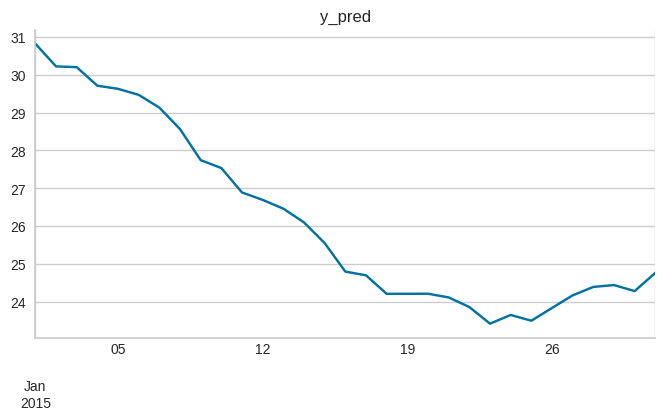

In [ ]:
# @title y_pred

from matplotlib import pyplot as plt
forecast_temperature['y_pred'].plot(kind='line', figsize=(8, 4), title='y_pred')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
train = df[:-31]
test = df[-31:] # Test refers to last 31 days.

In [ ]:
# import the regression module
from pycaret.regression import * # initialize setup

# Set data_split_shuffle and fold_shuffle to False
s = setup(data = train, test_data = test, target = 'demand', fold_strategy = 'timeseries',
          numeric_features = ['year', 'date','MA14','temperature','day_of_year'], categorical_features = ['month', 'day'],
          fold = 3, verbose=False, session_id = 123, data_split_shuffle=False, fold_shuffle=False)

In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15101.9981,374248327.4460,19307.6368,0.7817,0.0560,0.0444,0.7167
lightgbm,Light Gradient Boosting Machine,15779.6883,414717845.4892,20321.6013,0.7577,0.0585,0.0462,1.3667
rf,Random Forest Regressor,15787.6870,399085826.4871,19964.9152,0.7676,0.0577,0.0462,1.2600
et,Extra Trees Regressor,16283.3627,431278492.2212,20744.3111,0.7484,0.0599,0.0476,0.8833
ada,AdaBoost Regressor,16690.2269,401573680.5908,20032.3624,0.7664,0.0576,0.0482,0.5133
xgboost,Extreme Gradient Boosting,17587.8763,499693152.0000,22330.4512,0.7085,0.0643,0.0512,0.4300
ridge,Ridge Regression,20540.8270,775041144.9235,27837.8689,0.5497,0.0766,0.0585,0.1800
lr,Linear Regression,20546.7791,776343372.7668,27861.1492,0.5489,0.0767,0.0586,1.9700
lasso,Lasso Regression,20549.3030,775507357.2676,27846.0653,0.5494,0.0766,0.0586,0.2133
en,Elastic Net,20676.5784,791389436.4756,28131.2526,0.5405,0.0773,0.0588,0.1967


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,10981.9363,176198914.2134,13273.9939,0.6111,0.0387,0.0321


In [ ]:
# generate predictions on the original dataset
predictions = predict_model(best, data=df)# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2003-03-01', end = '2014-12-31', freq = 'D')# line plot
fig = px.line(predictions, x='Date', y=["demand","MA14"], template = 'plotly_dark')# add a vertical rectange for test-set separation
fig.add_vrect(x0="2014-12-01", x1="2014-12-31", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,14532.4847,304029919.1105,17436.4537,0.8270,0.0509,0.0425


In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('numerical_imputer',
                 TransformerWrapper(include=['year', 'date', 'MA14',
                                             'temperature', 'day_of_year'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['month', 'day'],
                                    transfor...='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['month'],
                                    transformer=OneHotEncoder(cols=['month'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['day'],
                                    transformer=TargetEncoder(cols=[],
                                                              handle_missing='return_nan'))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

In [ ]:
#Now, I will create the inputs that I will present to the model in order to make a demand forecast for a future date range.
# I will add the temperature values that I previously forecasted here.
# And then, I will use the future_df to score and generate predictions.
future_dates = pd.date_range(start = '2015-01-01', end = '2015-01-31', freq = 'D')
future_df = pd.DataFrame()
future_df['month'] = [i.month for i in future_dates]
future_df['year'] = [i.year for i in future_dates]
future_df['day'] = [i.day for i in future_dates]
future_df['day_of_year'] = [i.dayofyear for i in future_dates]
future_df['Series'] = np.arange(len(df),(len(df)+len(future_dates)))
future_df['temperature'] = forecast_temperature[-31:].reset_index(drop=True)
future_df

,month,year,day,day_of_year,Series,temperature
0,1,2015,1,1,4324,30.8192
1,1,2015,2,2,4325,30.2195
2,1,2015,3,3,4326,30.1997
3,1,2015,4,4,4327,29.7093
4,1,2015,5,5,4328,29.6280
5,1,2015,6,6,4329,29.4680
6,1,2015,7,7,4330,29.1312
7,1,2015,8,8,4331,28.5651
8,1,2015,9,9,4332,27.7456
9,1,2015,10,10,4333,27.5361


In [ ]:
# Convert the date column to datetime64 dtype
future_df['date'] = pd.to_datetime(future_df['date'])

# Now you can use the future_df with the predict_model function
predictions_future = predict_model(final_best, future_df)

In [ ]:
concat_df = pd.concat([df,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2003-03-01', end = '2015-01-31', freq = 'D')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["demand"], template = 'plotly_dark')
fig.show()

In [87]:
# prompt: write code for accuracy

model = final_best
mse = mean_squared_error(test['demand'], prediction_holdout['demand'])
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(test['demand'], prediction_holdout['demand'])
print('R2:', r2)


MSE: 0.0
RMSE: 0.0
R2: 1.0


In [ ]:
# functional API
save_model(concat_df, 'EnergyConsumption2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['year', 'date', 'MA14',
                                              'temperature', 'day_of_year'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['month', 'day'],
                                     transfor...
 2003-03-02    2           61    34.458333     NaN               NaN  
 2003-03-03    3           62    14.958333     NaN               NaN  
 2003-03-04    4           63    18.791667     NaN               NaN  
 2003-03-05    5           64    36.458333     NaN               NaN  
 ...         ...          ...          ...     ...               ...  
 2015-01-27   27     

In [83]:
# functional API
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/EnergyConsumption2')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('numerical_imputer',
                 TransformerWrapper(include=['year', 'date', 'MA14',
                                             'temperature', 'day_of_year'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['month', 'day...
2003-03-02    2           61    34.458333     NaN               NaN  
2003-03-03    3           62    14.958333     NaN               NaN  
2003-03-04    4           63    18.791667     NaN               NaN  
2003-03-05    5           64    36.458333     NaN               NaN  
...         ...          ...          ...     ...               ...  
2015-01-27   27     